<span style="color:b">HİDROJEN ATOMU
</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#BU HESAPTA HARTTRE BİRİM SİSTEMİNİ KULLANACAĞIZ
#Parametreler
r_max = 50.0       # Maksimum Bohr yarıçapı
N = 2000            # Grid noktası sayısı
dr = r_max / N      # Grid aralığı
l = 0               # Açısal momentum kuantum sayısı.s Ortibali için l=0 alıyoruz

# Radyal grid
r = np.linspace(dr, r_max, N)  # r=0 noktası tekillik oluşturacağından dahil etmiyoruz



###Harttre birim sisteminde 

$$ \Huge \frac{e^2}{4 \pi \varepsilon_0} = 1 $$ ℏ=1  ve  m=1



In [3]:
#Potansiyel enerji bu hali alır
V = -1.0 / r + l*(l+1) / (2 * r**2)



### Radyal Schrödinger Denklemi – Kinetik Enerji

Radyal Schrödinger denkleminin kinetik enerji kısmı:

$$ K = -\frac{1}{2} \frac{d^2}{dr^2}$$

İkinci türev, sonlu farklarla yaklaşık olarak şöyle yazılır:

$$\frac{d^2 u}{dr^2} \approx \frac{u_{i+1} - 2 u_i + u_{i-1}}{(dr)^2}$$

u_i=Ana Nokta

u_i-1,u_i+1 Komşu Noktalar




In [4]:
 #Kinetik enerji matrisi (sonlu farklar yöntemi)
diag = 1.0 / dr**2 + V #Ana diagonal u_i'den gelen terim
off_diag = -0.5/dr**2 * np.ones(N-1)#Yan diagonal komşu noktalardan gelen terim

# Hamilton matrisi
H = np.diag(diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Eigen değer ve eigen vektörleri
eigvals, eigvecs = np.linalg.eigh(H)

# İlk birkaç enerji seviyesini al
max_enerji_seviyesi = 6
nümerik_enerji = eigvals[:max_enerji_seviyesi]

# Analitik enerji seviyeleri (Hartree)
n_list = np.arange(1, max_enerji_seviyesi+1)
analitik_enerji = -1.0 / (2.0 * n_list**2)

# Hartree'den eV'ye dönüşüm
hartree_to_ev = 27.2114
nümerik_enerji_ev = nümerik_enerji * hartree_to_ev
analitik_enerji_ev = analitik_enerji * hartree_to_ev
df = pd.DataFrame({
    'n (analytic)': n_list,
    'E_analytic (eV)': analitik_enerji_ev,
    'E_numeric (eV)': nümerik_enerji_ev
})
print(df)


   n (analytic)  E_analytic (eV)  E_numeric (eV)
0             1       -13.605700      -13.603575
1             2        -3.401425       -3.401292
2             3        -1.511744       -1.511718
3             4        -0.850356       -0.849115
4             5        -0.544228       -0.486342
5             6        -0.377936       -0.062396


GRAFİK İÇİN GEREKLİ OLANLAR


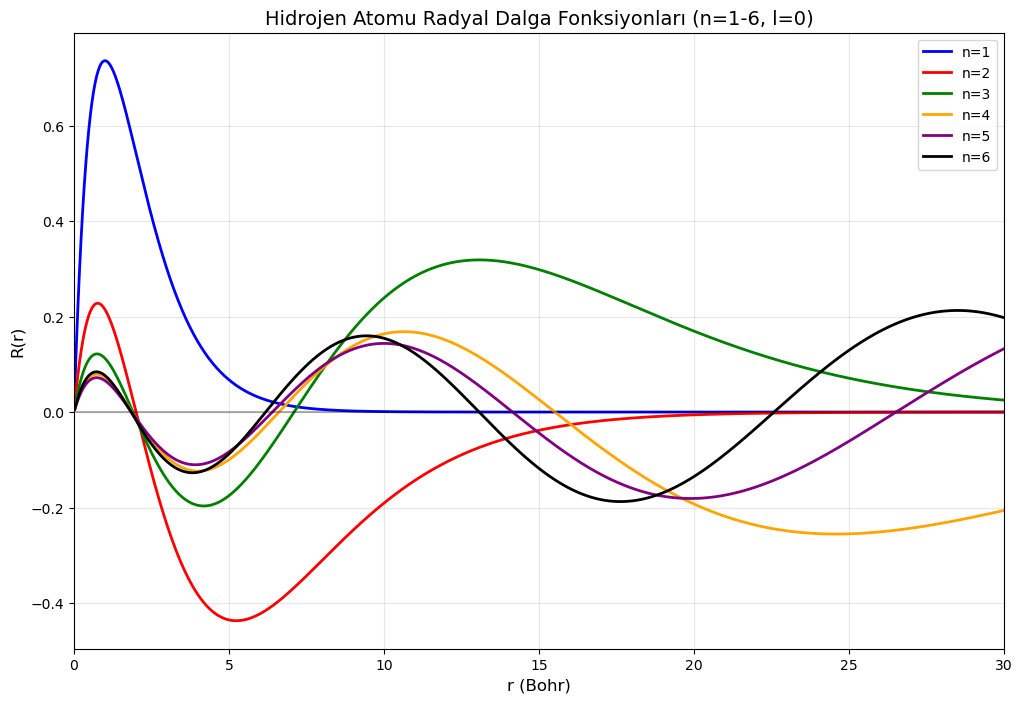

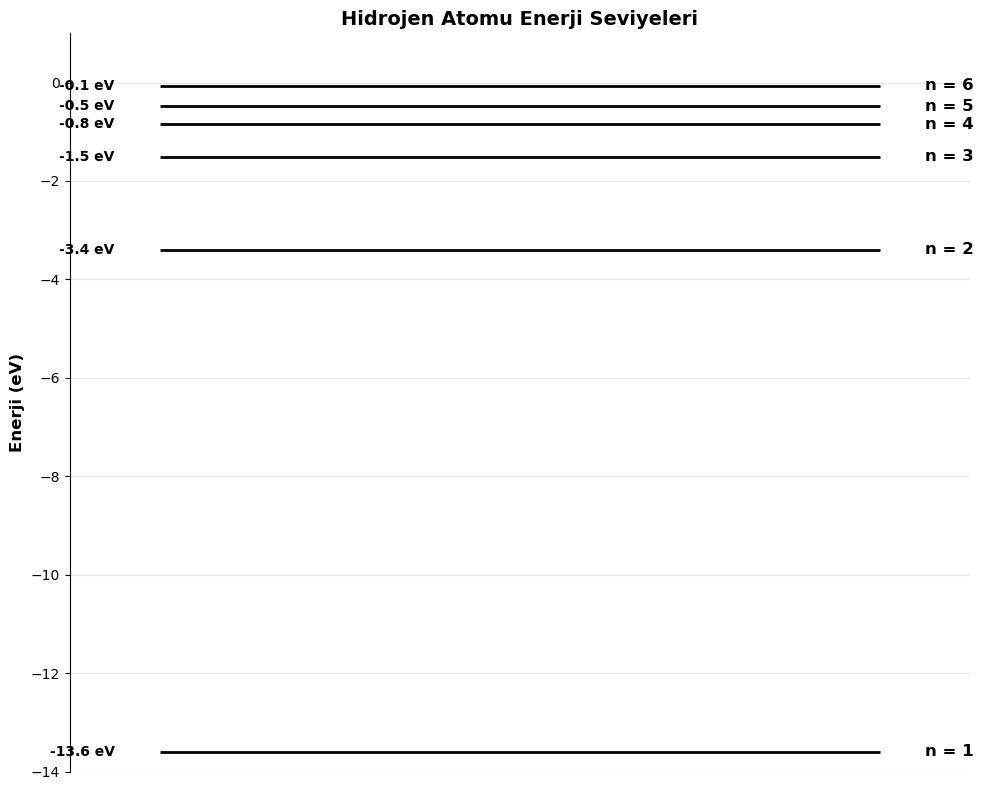

In [8]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']#Grafikteki eğrilerin renkleri

for i in range(max_enerji_seviyesi):
    # Dalga fonksiyonunu normalizasyonu
    psi = eigvecs[:, i]#Dalga Fonksiyonu
    norm = np.sqrt(np.trapezoid(psi**2, r))
    psi_normalized = psi / norm
    
    # Tüm dalga fonksiyonlarının +y ekseninden başlamasını sağla
    if psi_normalized[0] < 0:
        psi_normalized = -psi_normalized
    
    plt.plot(r, psi_normalized, color=colors[i], linewidth=2, 
             label=f'n={i+1}')
plt.xlabel('r (Bohr)', fontsize=12)
plt.ylabel('R(r)', fontsize=12)
plt.title('Hidrojen Atomu Radyal Dalga Fonksiyonları (n=1-6, l=0)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.show()

# GRAFİK 2: ENERJİ SEVİYELERİ DİYAGRAMI 
plt.figure(figsize=(10, 8))

# Enerji seviyelerini çiz
for i in range(max_enerji_seviyesi):
    energy = nümerik_enerji_ev[i]
    
    # Yatay çizgi (enerji seviyesi)
    plt.hlines(y=energy, xmin=0.1, xmax=0.9, color='black', linewidth=2)
    
    # Enerji değerini sol tarafa yaz
    plt.text(0.05, energy, f'{energy:.1f} eV', ha='right', va='center', 
             fontsize=10, fontweight='bold')
    
    # Kuantum sayısını sağ tarafa yaz
    plt.text(0.95, energy, f'n = {i+1}', ha='left', va='center', 
             fontsize=12, fontweight='bold')

# Eksenleri düzenleme
plt.xlim(0, 1)
plt.ylim(-14, 1)
plt.xlabel('')
plt.ylabel('Enerji (eV)', fontsize=12, fontweight='bold')
plt.title('Hidrojen Atomu Enerji Seviyeleri', fontsize=14, fontweight='bold')

# Eksen çizgilerini kaldırma
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticks([])

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

   